In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('startup_funding.csv')

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
sorted(df['Startup Name'].unique().tolist())

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [5]:
df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')

In [6]:
sorted(df['Investors Name'].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3029 non-null   object
 1   startup      3029 non-null   object
 2   vertical     2858 non-null   object
 3   subvertical  2104 non-null   object
 4   city         2849 non-null   object
 5   investors    3029 non-null   object
 6   round        3027 non-null   object
 7   amount       3029 non-null   object
dtypes: object(8)
memory usage: 213.0+ KB


### Problem with Investors dataset: Multiple investor names joined together with comma & many other problems

In [8]:
# Drop Remarks column, doesn't help us with anything tbhand 90% data is missing
# Make the Sr No column the index iteself
# Change Date column name to proper date and others as well
# Convert amount to Cr Rs
# date column is a string, change it to date data type
# dropna

df.drop(columns = ["Remarks"], inplace = True)

In [9]:
# Make the Sr No column the index iteself

df.set_index("Sr No", inplace = True)

In [10]:
# Change Date column name to proper date and others as well

df.rename(columns = {
    "Date dd/mm/yyyy" : "date",
    "Startup Name" : 'startup',
    "Industry Vertical" : 'vertical',
    "City  Location" : "city",
    "Investors Name" : "investors",
    "InvestmentnType" : "round",
    "Amount in USD" : "amount"
    
}, inplace = True)

In [11]:
df.rename(columns = {
    "SubVertical" : "subvertical"
    
}, inplace = True)

In [12]:
# Convert amount to Cr Rs
# There are missing values so deal with them

df['amount'] = df['amount'].fillna("0")

In [13]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [14]:
# Convert amount to int now
df = df[df['amount'].str.isdigit()]

In [17]:
df['amount'] = df['amount'].astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3029 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [19]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [21]:
# Convert the amount into crore rupees

def to_inr(dollar):
    inr = dollar * 82.5
    return inr / 10000000

In [23]:
df['amount'] = df['amount'].apply(to_inr)

In [24]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [33]:
# Date column
# df['date'] = df['date'].str.replace('13/01/2020','01/13/2020')
df['date'] = df['date'].str.replace('05/072018','05/07/2018')

In [35]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors = 'coerce')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3027 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [40]:
df['date'].dt.year

Sr No
1       2020.0
2       2020.0
3       2020.0
4       2020.0
5       2020.0
         ...  
3040    2015.0
3041    2015.0
3042    2015.0
3043    2015.0
3044    2015.0
Name: date, Length: 3029, dtype: float64

In [43]:
# Un rows ko nikal do jin mein missing values hai
# Subvertical include nahi kiya kyunke rows bohot zyada missing hai
df = df.dropna(subset = ['date','startup','vertical','city','investors','round','amount'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2846 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2846 non-null   datetime64[ns]
 1   startup      2846 non-null   object        
 2   vertical     2846 non-null   object        
 3   subvertical  2096 non-null   object        
 4   city         2846 non-null   object        
 5   investors    2846 non-null   object        
 6   round        2846 non-null   object        
 7   amount       2846 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 200.1+ KB


In [45]:
# Chalo clean data ko export karte hai

df.to_csv('startup_clean.csv', index = False)

In [49]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [53]:
df[df['investors'].str.contains(' IDG Ventures')].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.628844
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,181.500000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.375000
505,2017-11-21,Heckyl,Technology,Mumbai,Private Equity,22.275000
528,2017-05-10,Little Black Book,Consumer Internet,New Delhi,Private Equity,8.250000


In [59]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending = False)

startup
Lenskart                 495.000000
CureFit                  206.250000
Bizongo                  181.500000
Curefit                  123.750000
Xpressbees               103.125000
FirstCry.com              82.500000
POPxo                     70.950000
\\xc2\\xa0CloudCherry     49.500000
Sigtuple                  47.850000
Aasaanjobs                41.250000
RentMojo                  41.250000
PlaySimple                33.000000
Tripoto                   29.628844
Active.ai                 24.750000
Heckyl                    22.275000
Cloudcherry Analytics      8.250000
Little Black Book          8.250000
Name: amount, dtype: float64

### Investors kid sector mein sabse zyada invest karte hai ?

<Axes: ylabel='amount'>

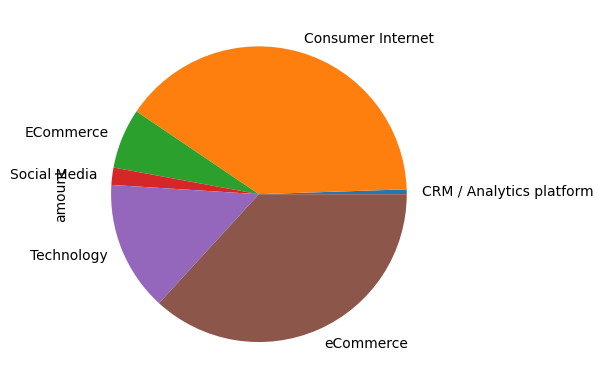

In [65]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind = 'pie')

<Axes: ylabel='amount'>

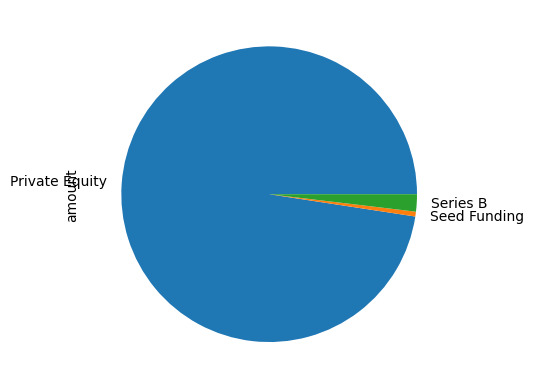

In [66]:
# Let's extract the stage as well now
df[df['investors'].str.contains(' IDG Ventures')].groupby('round')['amount'].sum().plot(kind = 'pie')

In [68]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('city')['amount'].sum()

city
Bangalore    452.100000
Chennai       57.750000
Delhi         45.375000
Mumbai       245.025000
New Delhi    558.453844
Pune         185.625000
Singapore     24.750000
Name: amount, dtype: float64

<Axes: xlabel='year'>

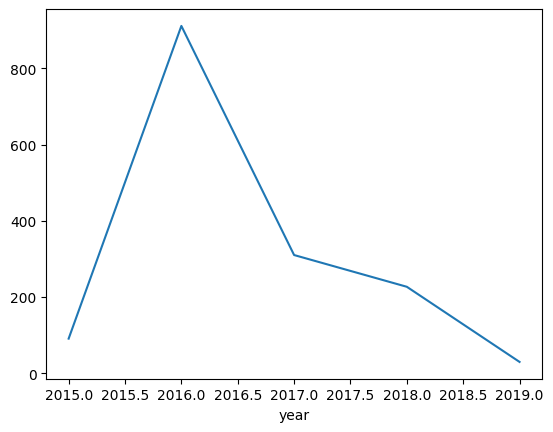

In [75]:
# Year on Year Investment Graph (YoY)
# Everyyear how much investment was done, in line chart
df['year'] = df['date'].dt.year
df[df['investors'].str.contains(' IDG Ventures')].groupby('year')['amount'].sum().plot()

In [76]:
# Perfect, ab loru nikalo similar Investors
# Khud se karna hoga
# ML Clustering bhi kar sakte hai
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020


# General Analysis

## MoM Chart

- Total + Count

In [78]:
round(df['amount'].sum())

301641

In [81]:
df['amount'].max()

np.float64(32175.0)

In [86]:
df.groupby('startup')['amount'].max().sort_values(ascending = False).head(1).values[0]

np.float64(32175.0)

In [88]:
df.groupby('startup')['amount'].sum().mean()

np.float64(130.12971106967214)

In [93]:
df['startup'].nunique()

2318

## MoM chat

Month on month chart .. basically har month kitna paisa laga

In [94]:
df['month'] = df['date'].dt.month

In [102]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()

In [104]:
temp_df['x_axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str') 

In [105]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,5274.637500,1-2015
1,1567.178250,2-2015
2,1913.298750,3-2015
3,4519.308750,4-2015
4,1405.552500,5-2015
...,...,...
58,3715.800000,12-2019
59,140.649250,1-2020
60,39.600000,2-2020
61,1801.460595,9-2020
